In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_data.csv')

In [4]:
df
df['not.fully.paid'].value_counts(normalize=True)

0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

## mondeling with imbalance target class

In [6]:
target=df['not.fully.paid']
features=df.drop('not.fully.paid',axis=1)

In [7]:
features['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [10]:
features['purpose']=features['purpose'].astype('category')

In [11]:
features['purpose'].cat.categories=list(range(0,7))

In [12]:
features['purpose']

0       2
1       1
2       2
3       2
4       1
5       1
6       2
7       0
8       4
9       2
10      2
11      2
12      2
13      6
14      2
15      5
16      0
17      1
18      2
19      5
20      0
21      0
22      1
23      1
24      2
25      0
26      0
27      2
28      0
29      0
       ..
9548    4
9549    4
9550    0
9551    4
9552    2
9553    2
9554    6
9555    4
9556    2
9557    1
9558    2
9559    1
9560    0
9561    0
9562    2
9563    2
9564    0
9565    0
9566    0
9567    0
9568    0
9569    4
9570    0
9571    0
9572    2
9573    0
9574    0
9575    2
9576    4
9577    2
Name: purpose, Length: 9578, dtype: category
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report

In [64]:
def class_report_by_algo(x,y,model):
    X_train,X_test,y_train,y_test = train_test_split(x,y)
    clf=model()
    clf.fit(X_train,y_train)
    
    prediction_test = clf.predict(X_test)
    prediction_train = clf.predict(X_train)
    
    print('class report data test')
    print(classification_report(y_test,prediction_test))
    print('============================================')
    print('class report data train')
    print(classification_report(y_train,prediction_train))

In [18]:
class_report_by_algo(features,target,LogisticRegression)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


class report data test
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2027
           1       0.53      0.02      0.04       368

    accuracy                           0.85      2395
   macro avg       0.69      0.51      0.48      2395
weighted avg       0.80      0.85      0.78      2395

class report data train
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      6018
           1       0.44      0.01      0.03      1165

    accuracy                           0.84      7183
   macro avg       0.64      0.51      0.47      7183
weighted avg       0.77      0.84      0.77      7183



In [19]:
class_report_by_algo(features,target,DecisionTreeClassifier)

class report data test
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1991
           1       0.22      0.24      0.23       404

    accuracy                           0.73      2395
   macro avg       0.53      0.53      0.53      2395
weighted avg       0.74      0.73      0.74      2395

class report data train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6054
           1       1.00      1.00      1.00      1129

    accuracy                           1.00      7183
   macro avg       1.00      1.00      1.00      7183
weighted avg       1.00      1.00      1.00      7183



In [20]:
class_report_by_algo(features,target,RandomForestClassifier)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


class report data test
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1986
           1       0.37      0.05      0.09       409

    accuracy                           0.82      2395
   macro avg       0.60      0.52      0.49      2395
weighted avg       0.75      0.82      0.76      2395

class report data train
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6059
           1       1.00      0.87      0.93      1124

    accuracy                           0.98      7183
   macro avg       0.99      0.93      0.96      7183
weighted avg       0.98      0.98      0.98      7183



In [21]:
class_report_by_algo(features,target,GradientBoostingClassifier)

class report data test
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2035
           1       0.41      0.04      0.07       360

    accuracy                           0.85      2395
   macro avg       0.63      0.51      0.49      2395
weighted avg       0.79      0.85      0.79      2395

class report data train
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      6010
           1       0.91      0.10      0.18      1173

    accuracy                           0.85      7183
   macro avg       0.88      0.55      0.55      7183
weighted avg       0.86      0.85      0.80      7183



# Handling a IMMBALANCE data

# UNDER (taker) SAMPLING

In [23]:
a=list(range(1,100))

In [25]:
minority_data=df[df['not.fully.paid']==1]
mayority_data=df[df['not.fully.paid']==0]

In [28]:
index_for_mayority=np.random.choice(mayority_data.index,len(minority_data))

In [30]:
df_class_0=df.loc[index_for_mayority]

In [32]:
undersampling_df=pd.concat([df_class_0,minority_data])

In [33]:
undersampling_df['not.fully.paid'].value_counts(normalize=True)

1    0.5
0    0.5
Name: not.fully.paid, dtype: float64

# modeling undersampling data

# feature Engineering

In [34]:
undersampling_df=pd.get_dummies(undersampling_df,columns=['purpose'],drop_first=True)

In [35]:
undersampling_df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
7228,1,0.1459,861.63,11.225243,14.64,712,4560.041667,31675,64.0,0,0,0,0,0,1,0,0,0,0
3728,1,0.1284,63.88,10.443484,23.29,672,3000.000000,24209,54.9,2,0,0,0,0,0,0,1,0,0
6029,1,0.1357,305.72,10.413313,11.14,682,3930.000000,3279,41.0,0,0,0,0,0,1,0,0,0,0
8361,0,0.1103,491.30,11.184421,6.50,707,990.041667,10935,27.3,1,0,0,0,0,1,0,0,0,0
4813,1,0.1253,669.33,11.405340,18.72,712,2910.000000,55770,62.0,0,0,0,0,0,1,0,0,0,0
2202,1,0.0963,481.42,11.608236,5.65,777,5370.041667,25476,16.5,1,0,0,0,0,0,0,0,0,1
7938,0,0.1407,136.00,10.736397,13.51,642,1708.958333,4033,53.1,8,0,0,0,0,1,0,0,0,0
2278,1,0.0768,187.15,11.010399,11.58,787,3810.041667,1157,5.2,0,0,0,0,0,0,0,1,0,0
6462,1,0.1183,646.12,11.140411,16.44,737,6570.000000,27414,62.4,2,0,0,0,1,0,0,0,0,0
4018,1,0.0932,47.93,10.815529,18.20,722,3720.000000,1498,6.7,1,0,0,0,0,0,0,0,0,0


# modeling Undersampling

In [36]:
target_U=undersampling_df['not.fully.paid']
features_U=undersampling_df.drop('not.fully.paid',axis=1)

In [38]:
class_report_by_algo(features,target,LogisticRegression)
print('========')
class_report_by_algo(features_U,target_U,LogisticRegression)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


class report data test
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2002
           1       0.69      0.02      0.04       393

    accuracy                           0.84      2395
   macro avg       0.77      0.51      0.48      2395
weighted avg       0.81      0.84      0.77      2395

class report data train
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      6043
           1       0.37      0.01      0.03      1140

    accuracy                           0.84      7183
   macro avg       0.61      0.50      0.47      7183
weighted avg       0.77      0.84      0.77      7183

class report data test
              precision    recall  f1-score   support

           0       0.60      0.67      0.63       395
           1       0.60      0.53      0.56       372

    accuracy                           0.60       767
   macro avg       0.60      0.60      0.60       767
weig

In [39]:
class_report_by_algo(features,target,DecisionTreeClassifier)
print('=============')
class_report_by_algo(features_U,target_U,DecisionTreeClassifier)


class report data test
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2011
           1       0.20      0.22      0.21       384

    accuracy                           0.74      2395
   macro avg       0.53      0.53      0.53      2395
weighted avg       0.75      0.74      0.74      2395

class report data train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6034
           1       1.00      1.00      1.00      1149

    accuracy                           1.00      7183
   macro avg       1.00      1.00      1.00      7183
weighted avg       1.00      1.00      1.00      7183

class report data test
              precision    recall  f1-score   support

           0       0.57      0.58      0.58       376
           1       0.59      0.58      0.59       391

    accuracy                           0.58       767
   macro avg       0.58      0.58      0.58       767
weig

In [40]:
class_report_by_algo(features,target,RandomForestClassifier)
print('====')
class_report_by_algo(features_U,target_U,RandomForestClassifier)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


class report data test
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2025
           1       0.28      0.05      0.08       370

    accuracy                           0.83      2395
   macro avg       0.56      0.51      0.49      2395
weighted avg       0.76      0.83      0.78      2395

class report data train
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      6020
           1       1.00      0.86      0.92      1163

    accuracy                           0.98      7183
   macro avg       0.99      0.93      0.96      7183
weighted avg       0.98      0.98      0.98      7183

====
class report data test
              precision    recall  f1-score   support

           0       0.58      0.64      0.61       384
           1       0.60      0.53      0.56       383

    accuracy                           0.59       767
   macro avg       0.59      0.59      0.59       767

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [41]:
class_report_by_algo(features,target,GradientBoostingClassifier)
print('=====')
class_report_by_algo(features_U,target_U,GradientBoostingClassifier)

class report data test
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2007
           1       0.50      0.03      0.05       388

    accuracy                           0.84      2395
   macro avg       0.67      0.51      0.48      2395
weighted avg       0.79      0.84      0.77      2395

class report data train
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      6038
           1       0.92      0.09      0.17      1145

    accuracy                           0.85      7183
   macro avg       0.89      0.54      0.54      7183
weighted avg       0.86      0.85      0.80      7183

=====
class report data test
              precision    recall  f1-score   support

           0       0.65      0.61      0.63       395
           1       0.61      0.65      0.63       372

    accuracy                           0.63       767
   macro avg       0.63      0.63      0.63       76

# OVERSAMPLING

## RANDOM OVERSAMPLING

In [43]:
from imblearn.over_sampling import RandomOverSampler,SMOTE

In [44]:
ros=RandomOverSampler()

In [46]:
X_ros,y_ros=ros.fit_sample(features,target)

In [47]:
df_over_all=pd.DataFrame(X_ros,columns=features.columns)
df_over_all['not.fully.paid'] = y_ros

In [48]:
df_over_all['not.fully.paid'].value_counts()

1    8045
0    8045
Name: not.fully.paid, dtype: int64

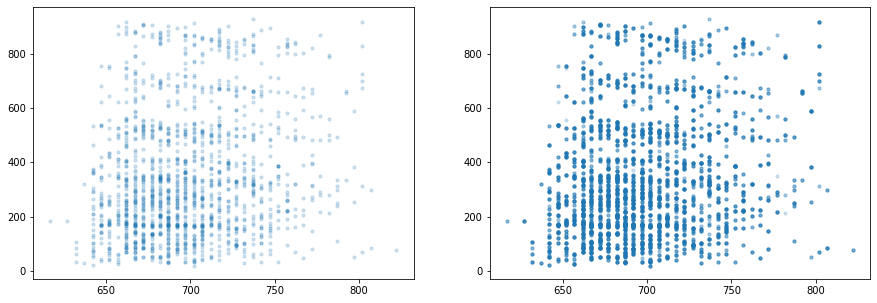

In [57]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].scatter(df[df['not.fully.paid']==1]['fico'],df[df['not.fully.paid']==1]['installment'],s=10,alpha=0.2)
ax[1].scatter(df_over_all[df_over_all['not.fully.paid']==1]['fico'],df_over_all[df_over_all['not.fully.paid']==1]['installment'],s=10,alpha=0.2)

In [58]:
class_report_by_algo(df_over_all.drop('not.fully.paid',axis=1),df_over_all['not.fully.paid'],LogisticRegression)

class report data test
              precision    recall  f1-score   support

           0       0.59      0.64      0.61      2011
           1       0.61      0.57      0.59      2012

    accuracy                           0.60      4023
   macro avg       0.60      0.60      0.60      4023
weighted avg       0.60      0.60      0.60      4023

class report data train
              precision    recall  f1-score   support

           0       0.60      0.65      0.62      6034
           1       0.61      0.56      0.59      6033

    accuracy                           0.60     12067
   macro avg       0.60      0.60      0.60     12067
weighted avg       0.60      0.60      0.60     12067



C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [60]:
class_report_by_algo(features,target,DecisionTreeClassifier)
print('==========')
class_report_by_algo(df_over_all.drop('not.fully.paid',axis=1),df_over_all['not.fully.paid'],DecisionTreeClassifier)

class report data test
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1998
           1       0.22      0.22      0.22       397

    accuracy                           0.74      2395
   macro avg       0.53      0.53      0.53      2395
weighted avg       0.74      0.74      0.74      2395

class report data train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6047
           1       1.00      1.00      1.00      1136

    accuracy                           1.00      7183
   macro avg       1.00      1.00      1.00      7183
weighted avg       1.00      1.00      1.00      7183

class report data test
              precision    recall  f1-score   support

           0       0.98      0.79      0.88      2034
           1       0.82      0.99      0.90      1989

    accuracy                           0.89      4023
   macro avg       0.90      0.89      0.89      4023
weig

In [65]:
def class_report_by_algo_oversampling(x,y,model):
    X_train,X_test,y_train,y_test = train_test_split(x,y)
    clf=model()
    ros=RandomOverSampler()
    X_ros,y_ros=ros.fit_sample(X_train,y_train)
    clf.fit(X_ros,y_ros)
    
    prediction_test = clf.predict(X_test)
    prediction_train = clf.predict(X_ros)
    
    print('class report data test')
    print(classification_report(y_test,prediction_test))
    print('============================================')
    print('class report data train')
    print(classification_report(y_ros,prediction_train))

In [68]:
class_report_by_algo(features,target,LogisticRegression)
print('====\nundersampling\n====')
class_report_by_algo(features_U,target_U,LogisticRegression)
print('====\nOversampling\n====')
class_report_by_algo_oversampling(features,target,LogisticRegression)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


class report data test
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2027
           1       0.50      0.01      0.02       368

    accuracy                           0.85      2395
   macro avg       0.67      0.50      0.47      2395
weighted avg       0.79      0.85      0.78      2395

class report data train
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      6018
           1       0.41      0.01      0.03      1165

    accuracy                           0.84      7183
   macro avg       0.63      0.51      0.47      7183
weighted avg       0.77      0.84      0.77      7183

====
undersampling
====
class report data test
              precision    recall  f1-score   support

           0       0.59      0.66      0.62       376
           1       0.63      0.55      0.59       391

    accuracy                           0.60       767
   macro avg       0.61      0.60 

In [69]:
class_report_by_algo(features,target,DecisionTreeClassifier)
print('====\nundersampling\n====')
class_report_by_algo(features_U,target_U,DecisionTreeClassifier)
print('====\nOversampling\n====')
class_report_by_algo_oversampling(features,target,DecisionTreeClassifier)


class report data test
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2011
           1       0.21      0.24      0.23       384

    accuracy                           0.73      2395
   macro avg       0.53      0.54      0.53      2395
weighted avg       0.75      0.73      0.74      2395

class report data train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6034
           1       1.00      1.00      1.00      1149

    accuracy                           1.00      7183
   macro avg       1.00      1.00      1.00      7183
weighted avg       1.00      1.00      1.00      7183

====
undersampling
====
class report data test
              precision    recall  f1-score   support

           0       0.54      0.59      0.56       370
           1       0.58      0.54      0.56       397

    accuracy                           0.56       767
   macro avg       0.56      0.56 

In [70]:
class_report_by_algo(features,target,GradientBoostingClassifier)
print('====\nundersampling\n====')
class_report_by_algo(features_U,target_U,GradientBoostingClassifier)
print('====\nOversampling\n====')
class_report_by_algo_oversampling(features,target,GradientBoostingClassifier)


class report data test
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2008
           1       0.30      0.02      0.03       387

    accuracy                           0.84      2395
   macro avg       0.57      0.50      0.47      2395
weighted avg       0.75      0.84      0.77      2395

class report data train
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      6037
           1       0.96      0.08      0.15      1146

    accuracy                           0.85      7183
   macro avg       0.91      0.54      0.54      7183
weighted avg       0.87      0.85      0.80      7183

====
undersampling
====
class report data test
              precision    recall  f1-score   support

           0       0.58      0.62      0.60       366
           1       0.63      0.60      0.61       401

    accuracy                           0.61       767
   macro avg       0.61      0.61 

# Smote

# Syntetic Minority Over Sampling 

In [71]:
sm=SMOTE(random_state=101)

In [72]:
X_sm,y_sm=sm.fit_sample(features,target)

In [73]:
df_smote_all=pd.DataFrame(X_sm,columns=features.columns)

In [74]:
df_smote_all['not.fully.paid']=y_sm

In [75]:
df_smote_all['not.fully.paid'].value_counts()

1    8045
0    8045
Name: not.fully.paid, dtype: int64

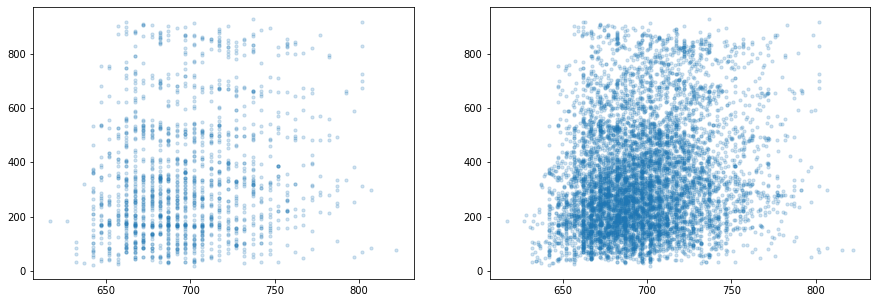

In [76]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].scatter(df[df['not.fully.paid']==1]['fico'],df[df['not.fully.paid']==1]['installment'],s=10,alpha=0.2)
ax[1].scatter(df_smote_all[df_smote_all['not.fully.paid']==1]['fico'],df_smote_all[df_smote_all['not.fully.paid']==1]['installment'],s=10,alpha=0.2)

In [78]:
class_report_by_algo(features,target,LogisticRegression)
print('===')
class_report_by_algo(df_smote_all.drop('not.fully.paid',axis=1),df_smote_all['not.fully.paid'],LogisticRegression)


class report data test
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2001
           1       0.25      0.01      0.01       394

    accuracy                           0.83      2395
   macro avg       0.54      0.50      0.46      2395
weighted avg       0.74      0.83      0.76      2395

class report data train
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      6044
           1       0.47      0.01      0.03      1139

    accuracy                           0.84      7183
   macro avg       0.66      0.51      0.47      7183
weighted avg       0.78      0.84      0.77      7183

===
class report data test
              precision    recall  f1-score   support

           0       0.62      0.64      0.63      2043
           1       0.62      0.59      0.60      1980

    accuracy                           0.62      4023
   macro avg       0.62      0.62      0.62      4023


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [79]:
class_report_by_algo(features,target,DecisionTreeClassifier)
print('===')
class_report_by_algo(df_smote_all.drop('not.fully.paid',axis=1),df_smote_all['not.fully.paid'],DecisionTreeClassifier)

class report data test
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1997
           1       0.21      0.23      0.22       398

    accuracy                           0.73      2395
   macro avg       0.53      0.53      0.53      2395
weighted avg       0.74      0.73      0.73      2395

class report data train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6048
           1       1.00      1.00      1.00      1135

    accuracy                           1.00      7183
   macro avg       1.00      1.00      1.00      7183
weighted avg       1.00      1.00      1.00      7183

===
class report data test
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1994
           1       0.82      0.84      0.83      2029

    accuracy                           0.83      4023
   macro avg       0.83      0.83      0.83      4023


In [80]:
def class_report_by_algo_smote(x,y,model):
    X_train,X_test,y_train,y_test = train_test_split(x,y)
    sm=SMOTE(random_state=101)
    X_sm,y_sm=sm.fit_sample(X_train,y_train)
    clf=model()
    clf.fit(X_sm,y_sm)
    
    prediction_test = clf.predict(X_test)
    prediction_train = clf.predict(X_sm)
    
    print('class report data test')
    print(classification_report(y_test,prediction_test))
    print('============================================')
    print('class report data train')
    print(classification_report(y_sm,prediction_train))

In [81]:
class_report_by_algo(features,target,GradientBoostingClassifier)
print('====\nundersampling\n====')
class_report_by_algo(features_U,target_U,GradientBoostingClassifier)
print('====\nOversampling\n====')
class_report_by_algo_oversampling(features,target,GradientBoostingClassifier)
print('====\nSMOTE\n====')
class_report_by_algo_smote(features,target,GradientBoostingClassifier)


class report data test
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2023
           1       0.31      0.02      0.04       372

    accuracy                           0.84      2395
   macro avg       0.58      0.51      0.48      2395
weighted avg       0.76      0.84      0.78      2395

class report data train
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      6022
           1       0.95      0.11      0.19      1161

    accuracy                           0.85      7183
   macro avg       0.90      0.55      0.55      7183
weighted avg       0.87      0.85      0.80      7183

====
undersampling
====
class report data test
              precision    recall  f1-score   support

           0       0.64      0.67      0.66       381
           1       0.66      0.63      0.64       386

    accuracy                           0.65       767
   macro avg       0.65      0.65 

In [82]:
class_report_by_algo(features,target,DecisionTreeClassifier)
print('====\nundersampling\n====')
class_report_by_algo(features_U,target_U,DecisionTreeClassifier)
print('====\nOversampling\n====')
class_report_by_algo_oversampling(features,target,DecisionTreeClassifier)
print('====\nSMOTE\n====')
class_report_by_algo_smote(features,target,DecisionTreeClassifier)


class report data test
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2009
           1       0.21      0.21      0.21       386

    accuracy                           0.74      2395
   macro avg       0.53      0.53      0.53      2395
weighted avg       0.74      0.74      0.74      2395

class report data train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6036
           1       1.00      1.00      1.00      1147

    accuracy                           1.00      7183
   macro avg       1.00      1.00      1.00      7183
weighted avg       1.00      1.00      1.00      7183

====
undersampling
====
class report data test
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       387
           1       0.58      0.55      0.57       380

    accuracy                           0.58       767
   macro avg       0.58      0.58 

In [83]:
class_report_by_algo(features,target,LogisticRegression)
print('====\nundersampling\n====')
class_report_by_algo(features_U,target_U,LogisticRegression)
print('====\nOversampling\n====')
class_report_by_algo_oversampling(features,target,LogisticRegression)
print('====\nSMOTE\n====')
class_report_by_algo_smote(features,target,LogisticRegression)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


class report data test
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2007
           1       0.42      0.01      0.02       388

    accuracy                           0.84      2395
   macro avg       0.63      0.50      0.47      2395
weighted avg       0.77      0.84      0.77      2395

class report data train
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      6038
           1       0.39      0.01      0.03      1145

    accuracy                           0.84      7183
   macro avg       0.62      0.50      0.47      7183
weighted avg       0.77      0.84      0.77      7183

====
undersampling
====
class report data test
              precision    recall  f1-score   support

           0       0.61      0.65      0.63       392
           1       0.61      0.57      0.59       375

    accuracy                           0.61       767
   macro avg       0.61      0.61 

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
